In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices, dmatrix # 可根据离散变量自动生成哑变量

from sklearn.model_selection import train_test_split


In [2]:
train=pd.read_csv('ml_problems_13_train.csv')
test=pd.read_csv('ml_problems_13_test.csv')


In [3]:
print(train.shape)
train.head(2)

(8600, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


False


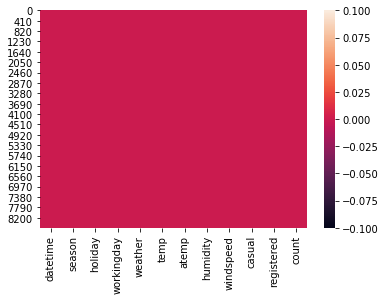

In [4]:
sns.heatmap(train.isnull()) # checking missing data
print(train.isnull().values.any()) # no missing data. 


In [5]:
#transfer datatime to month and hour. 
#data and year data is not useful. 

def transfer_datetime(data):
    datetime=data['datetime']
    date=datetime.apply(lambda x:x.split(' ')[0])
    month=date.apply(lambda x:x.split('-')[1])
    
    time=datetime.apply(lambda x:x.split(' ')[1])
    hour=time.apply(lambda x:x.split(':')[0])
    
    return month, hour
    

In [6]:
#create new train data. 
month,hour=transfer_datetime(train)
train.insert(1,"month",month)
train.insert(2,"hour",hour)
X_train=train.drop(['datetime','casual','registered'],axis=1)





# season, hour, month, working day, hoilday, weather, temp, atemp, humidity, windspeed vs count
#visiualize data


In [7]:
#hour vs count
X_train.groupby('season').mean()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
season,,,,,,,,
1,0.010813,0.698166,1.411848,11.887880,14.476481,55.598966,14.439933,111.514339
2,0.011127,0.699583,1.412610,22.573380,26.367942,59.784423,13.817049,213.624015
3,0.044506,0.666203,1.366249,29.175197,33.103507,64.375985,11.398949,234.596198
4,0.044465,0.666512,1.449282,16.730811,20.172818,66.515053,11.395515,201.277443


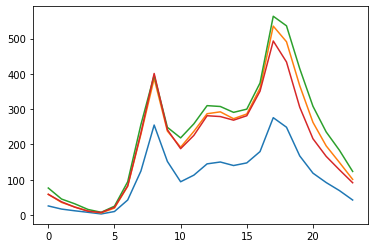

In [8]:
plt.plot(range(24), X_train[X_train['season']==1].groupby('hour').mean()['count'],label='1')
plt.plot(range(24), X_train[X_train['season']==2].groupby('hour').mean()['count'],label='2')
plt.plot(range(24), X_train[X_train['season']==3].groupby('hour').mean()['count'],label='3')
plt.plot(range(24), X_train[X_train['season']==4].groupby('hour').mean()['count'],label='4')
#seasonal hr plot
plt.show()

In [9]:
X_train.groupby('weather').mean()


,season,holiday,workingday,temp,atemp,humidity,windspeed,count
weather,,,,,,,,
1,2.492177,0.027816,0.678894,20.348745,23.792644,56.513734,12.758808,203.342663
2,2.543068,0.032243,0.681253,19.758563,23.259118,68.884385,12.375258,179.370797
3,2.501479,0.013314,0.717456,19.347633,22.577374,81.328402,13.973683,117.389053
4,1.000000,0.000000,1.000000,8.200000,11.365000,86.000000,6.003200,164.000000


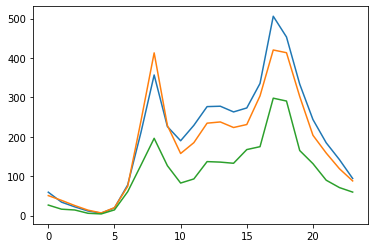

In [10]:
plt.plot(range(24), X_train[X_train['weather']==1].groupby('hour').mean()['count'])
plt.plot(range(24), X_train[X_train['weather']==2].groupby('hour').mean()['count'])
plt.plot(range(24), X_train[X_train['weather']==3].groupby('hour').mean()['count'])
#seasonal hr plot
plt.show()

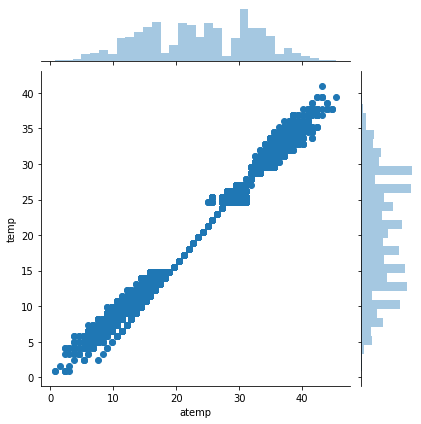

In [11]:

sns.jointplot('atemp','temp',X_train)

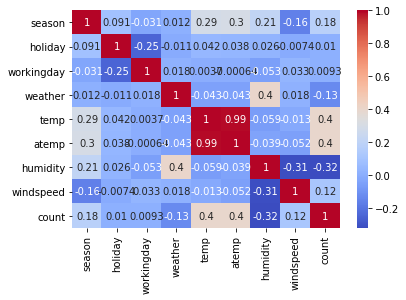

In [12]:
sns.heatmap(X_train.corr(),cmap='coolwarm',annot=True)


In [13]:

Xdata=X_train.drop(['atemp','humidity'],axis=1)


In [14]:
Xdata.head()

,month,hour,season,holiday,workingday,weather,temp,windspeed,count
0,01,00,1,0,0,1,9.84,0.0,16
1,01,01,1,0,0,1,9.02,0.0,40
2,01,02,1,0,0,1,9.02,0.0,32
3,01,03,1,0,0,1,9.84,0.0,13
4,01,04,1,0,0,1,9.84,0.0,1


In [15]:
# dummy variable. 

y, X = dmatrices('count~month+hour+season+holiday+workingday+weather+temp+windspeed', Xdata, return_type='dataframe')

ydata=np.log(y) # need log(y), otherwise negative counts. 
X.head()


,Intercept,month[T.02],month[T.03],month[T.04],month[T.05],month[T.06],month[T.07],month[T.08],month[T.09],month[T.10],...,hour[T.20],hour[T.21],hour[T.22],hour[T.23],season,holiday,workingday,weather,temp,windspeed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.84,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.02,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.02,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.84,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.84,0.0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, ydata, test_size=0.2, random_state=42)


# linear regression

In [17]:
from sklearn.linear_model import LinearRegression
line_model=LinearRegression()
line_model.fit(X_train,y_train)
y_predict=line_model.predict(X_test)
y_count_test=np.exp(y_test)
y_count_predict=np.exp(y_predict)
y_count_test.head()

,count
3254,25.0
7883,20.0
7504,73.0
3880,11.0
6153,49.0


In [18]:
def RMSLE(y_test,y_predict):
    
    RMSLE=(np.log2(y_test+1)-np.log2(y_predict+1))**2
    

    RMSLE=np.sqrt(np.mean(RMSLE))
    return RMSLE

In [19]:
RMSLE_Linear_Reg=RMSLE(y_count_test,y_count_predict)
print('RMSLE Linear Regression:',RMSLE_Linear_Reg)

RMSLE Linear Regression: count    0.920697
dtype: float64


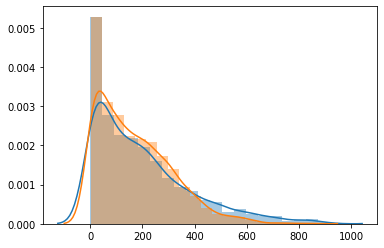

In [20]:
sns.distplot(y_count_test,bins=20)
sns.distplot(y_count_predict,bins=20)  
#somehow over-estimated.

# lasso reg

In [21]:
from sklearn.linear_model import Lasso

def Linear_Lasso(alpha,X_train,y_train, X_test, y_test):
    line_model_lasso=Lasso(alpha=alpha)
    line_model_lasso.fit(X_train,y_train)
    
    y_predict_lasso=line_model_lasso.predict(X_test)
    
    y_count_test_lasso=np.array(np.exp(y_test)['count'])
    y_count_predict_lasso=np.exp(y_predict_lasso)
    
    return y_count_test_lasso,y_count_predict_lasso


In [22]:
alphas=np.logspace(-4,3,8,base=10)
alphas

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [23]:
RMSLEs=[]
for alpha in alphas:
    y_test_lasso,y_predict_lasso=Linear_Lasso(alpha,X_train,y_train, X_test, y_test)
    RMSLE_Lasso=RMSLE(y_test_lasso,y_predict_lasso)
    RMSLEs.append(RMSLE_Lasso)

In [24]:
y_predict_lasso

array([92.25508265, 92.25508265, 92.25508265, ..., 92.25508265,
       92.25508265, 92.25508265])

# Lasso alpha Learn rate vs RMSLE

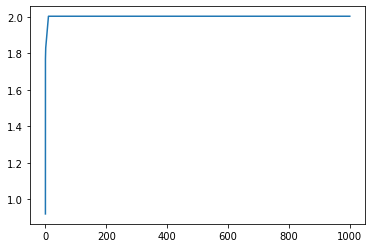

In [25]:
plt.plot(alphas, RMSLEs)

# Lasso predict vs test count overlay

In [26]:
alpha=0.001
y_test_lasso_plot,y_predict_lasso_plot=Linear_Lasso(alpha,X_train,y_train, X_test, y_test)


In [27]:
RMSLE_Lasso=RMSLE(y_test_lasso_plot,y_predict_lasso_plot)
print('RMSLE lasso:',RMSLE_Lasso)

RMSLE lasso: 0.9249337971652718


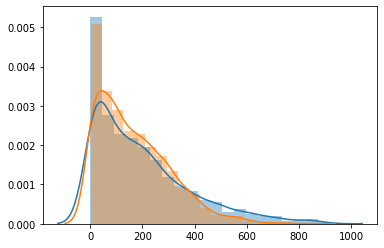

In [28]:

sns.distplot(y_test_lasso_plot,bins=20)
sns.distplot(y_predict_lasso_plot,bins=20) # why negative. 
#not accurate when the count is high and 50-250 are overestimate.

# ridge regression

In [29]:
from sklearn.linear_model import Ridge

In [30]:
line_model_ridge=Ridge(alpha=0.25)
line_model_ridge.fit(X_train,y_train)

y_predict_ridge=line_model_ridge.predict(X_test)

y_count_test_Ridge=np.exp(y_test)
y_count_predict_Ridge=np.exp(y_predict_ridge)


In [31]:
RMSLE_Ridge=RMSLE(y_count_test_Ridge,y_count_predict_Ridge)
print('RMSLE Ridge:',RMSLE_Ridge.values)

RMSLE Ridge: [0.92057283]


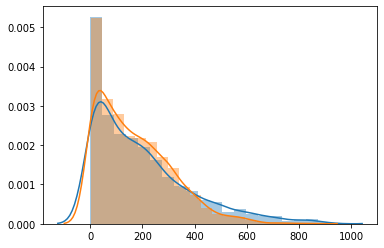

In [32]:
sns.distplot(y_count_test_Ridge,bins=20)
sns.distplot(y_count_predict_Ridge,bins=20)  
#somehow over-estimated.

# Random forest regression

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import  StandardScaler


#normalize numerical data

In [34]:
num_col=['temp','windspeed']
def scaler_data(X_train,num_col):
    num_col=['temp','windspeed']
    scalers=dict()
    for col in num_col:
        if col in X_train.columns:
            print(col)
            scaler = StandardScaler()
            scaler.fit(X_train[col].values.reshape(-1,1))
            col_transform=scaler.transform(X_train[col].values.reshape(-1,1))
            X_train=X_train.drop(col,axis=1)
            X_train.insert(X_train.shape[1],col,col_transform)
    return X_train

In [35]:
X_train=scaler_data(X_train,num_col)
X_test=scaler_data(X_test,num_col)

temp
windspeed
temp
windspeed


In [36]:
rfregressor = RandomForestRegressor(n_estimators=500)
rfregressor.fit(X_train, y_train.values.ravel())
y_predictions2 = rfregressor.predict(X_test)

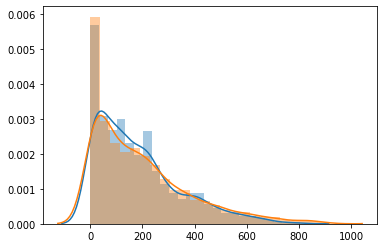

In [37]:
sns.distplot(np.exp(y_predictions2) )
sns.distplot(np.exp(y_test))

In [38]:
RMSLE_Rf=RMSLE(np.exp(y_predictions2),np.exp(y_test['count']))

print('RMSLE Random forest:',RMSLE_Rf)

RMSLE Random forest: 0.6991611209030532


# Random forest looks better predict. 

# now predict the test.csv

In [39]:
test=pd.read_csv('ml_problems_13_test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-16 00:00:00,1,0,0,1,10.66,15.150,56,0.0000
1,2011-01-16 01:00:00,1,0,0,1,10.66,13.635,56,8.9981
2,2011-01-16 02:00:00,1,0,0,1,10.66,14.395,56,6.0032
3,2011-01-16 03:00:00,1,0,0,1,9.02,13.635,69,0.0000
4,2011-01-16 04:00:00,1,0,0,1,10.66,12.880,56,11.0014


In [40]:
#test data on test.csv
#convert test data
month_test,hour_test=transfer_datetime(test)
test.insert(1,"month",month)
test.insert(2,"hour",hour)
test.head()
Xtest=test.drop(['datetime','atemp','humidity'],axis=1)
Xtest.head()

,month,hour,season,holiday,workingday,weather,temp,windspeed
0,01,00,1,0,0,1,10.66,0.0000
1,01,01,1,0,0,1,10.66,8.9981
2,01,02,1,0,0,1,10.66,6.0032
3,01,03,1,0,0,1,9.02,0.0000
4,01,04,1,0,0,1,10.66,11.0014


In [41]:
X_predict = dmatrix('month+hour+season+holiday+workingday+weather+temp+windspeed', Xtest, return_type='dataframe')
X_predict.head(2) # missing month 8 9 10 11 12


,Intercept,month[T.02],month[T.03],month[T.04],month[T.05],month[T.06],month[T.07],hour[T.01],hour[T.02],hour[T.03],...,hour[T.20],hour[T.21],hour[T.22],hour[T.23],season,holiday,workingday,weather,temp,windspeed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10.66,0.0000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10.66,8.9981


In [42]:
fill_month=np.zeros(X_predict.shape[0])

fill_month=pd.DataFrame(fill_month)

X_predict.insert(7,"month[T.08]",fill_month)
X_predict.insert(8,"month[T.09]",fill_month)
X_predict.insert(9,"month[T.10]",fill_month)
X_predict.insert(10,"month[T.11]",fill_month)
X_predict.insert(11,"month[T.12]",fill_month)
print(X_predict.isnull().values.any()) # no missing data. 
X_predict.head(2)

False


,Intercept,month[T.02],month[T.03],month[T.04],month[T.05],month[T.06],month[T.07],month[T.08],month[T.09],month[T.10],...,hour[T.20],hour[T.21],hour[T.22],hour[T.23],season,holiday,workingday,weather,temp,windspeed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10.66,0.0000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10.66,8.9981


In [43]:
X_predict=scaler_data(X_predict,num_col)

temp
windspeed


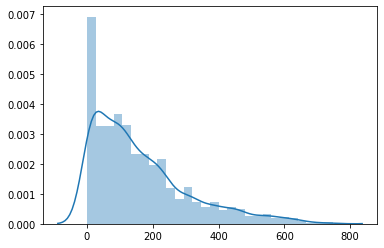

In [44]:
y_predictions3 = rfregressor.predict(X_predict)
sns.distplot(np.exp(y_predictions3))
